<a href="https://colab.research.google.com/github/hallam-flda/gambling_market_analyses/blob/main/Roulette_and_Stochastic_Processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Budget Constraints and Casino Profitability - Stochastic Processes Theory**



## Introduction

The relationship between the target return to casino and actual returns with respect to a stop gap can be described as a stochastic process with stopping time.

It has been a long time since I learnt any of this, so I'm going to start by going over some of the theory


## Simple Random Walk




### Proof of Expected Value
For a random Independent and Identically Distributed variable

<br>

$$Y_i \stackrel{iid}{\sim} \begin{cases}
1, & \text{with probability } 0.5 \\
-1, & \text{with probability } 0.5
\end{cases}$$

for each $t,$   


$$X_{t} = \displaystyle\sum_{i=1}^{t} Y_i$$

and


$$X_{0} = 0$$

<br>

since the probability of both outcomes is 0.5, over infinite repeats we would expect the final balance for a player in a fair coin-toss game to be

<br>
$$ E\left[X_t\right] = E\left[\displaystyle\sum_{i=1}^t Y_i\right] = \displaystyle\sum_{i=1}^t E\left[Y_i\right] = t \cdot 0 = 0$$

<br>


since we have t repetitions of $E\left[Y_i\right]$ and

<br>


$$ E\left[Y_i\right] = (-1) \cdot P(Y_i = -1) + (1) \cdot P(Y_i = 1) $$

$$= (-1) \cdot 0.5 + (1) \cdot 0.5 = 0$$

### Proof of Variance

#### 1. For Single Step

The equation for the variance of any random variable is given by the following equation:

<br>

$$ \mathrm{Var}[{X}] = E[X^2] - (E[X])^2$$

<br>

therefore the variance after a single step $Y_{i}$ is given by:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 $$

<br>

$Y_{i}$ can only take two values, -1 or 1, or more formally:

<br>
$$ Y_{i} \in \left\{ -1, 1 \right\} $$

<br>

therefore:

<br>

$$E[Y_{i}^2] = (-1)^2 \cdot P(Y_{i} = -1) + (1)^2 \cdot P(Y_{i} = 1) = 1 \cdot 0.5 + 1 \cdot 0.5 = 0.5 + 0.5 = 1$$

<br>

and the mean value is given by:

<br>

$$ E[Y_{i}] = (-1) \cdot 0.5 + 1 \cdot 0.5 = 0 $$

<br>

so the square of the mean term in the variance equation is:

<br>

$$ (E[Y_{i}])^2 = 0^2 = 0 $$

<br>

and therefore substituting these into the variance formula yields:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 = 1 - 0^2 = 1 $$

#### 2. For Any Step t

From the Expected Value proof we know that $ X_{t} = \displaystyle\sum_{i=1}^{t}Y_{i}$ and since the $Y_{i}$ are independent random variables:

<br>

$$ \mathrm{Var}(X_{t}) = \mathrm{Var}\left(\displaystyle\sum_{i=1}^{t}Y_{i}\right) = \displaystyle\sum_{i=1}^{t}\mathrm{Var}(Y_{i}) $$

<br>

and since $\mathrm{Var}(Y_{i}) = 1$ for all $i$:

<br>

$$ \mathrm{Var}(X_{t}) = \displaystyle\sum_{i=1}^{t} 1 = t $$

<br>

so the variance of the random walk $X_{t}$ at time $t$ is proportional to $t$. Note that this also means the standard deviation of $X_{t}$ is

<br>

$$ \mathrm{Std}(X_{t}) = \sqrt{\mathrm{Var}(X_{t})} = \pm\sqrt{t}$$

### Python Implementation

First I'm going to create a fair random walk process which can be seen as analagous to a coin flip game

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
def random_walk(n_trials):
  balance = [0,]
  t = [0,]
  running_balance = 0
  running_t = 0
  for i in range(n_trials):
    outcome = random.randint(0,1)
    if outcome == 0:
      running_balance -= 1
      balance.append(running_balance)
    else:
      running_balance += 1
      balance.append(running_balance)
    running_t += 1
    t.append(running_t)
  return t, balance



Running the code below will produce a different random result of t=10 steps every time. In a small sample it is not easy to see that this is expected to converge to zero.

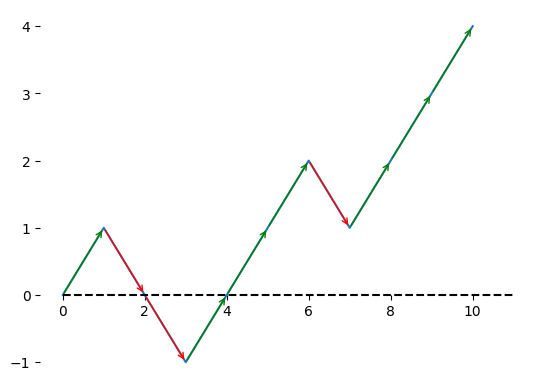

In [4]:
list_1, list_2 = random_walk(10)
plt.plot(list_1, list_2)

for i in range(1, len(list_1)):
    dx = list_1[i] - list_1[i-1]
    dy = list_2[i] - list_2[i-1]

    # Determine the arrow direction
    if dy > 0:  # Upward step
        plt.annotate('', xy=(list_1[i], list_2[i]), xytext=(list_1[i-1], list_2[i-1]),
                     arrowprops=dict(arrowstyle='->', color='green', lw=1))
    elif dy < 0:  # Downward step
        plt.annotate('', xy=(list_1[i], list_2[i]), xytext=(list_1[i-1], list_2[i-1]),
                     arrowprops=dict(arrowstyle='->', color='red', lw=1))

ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))
plt.hlines(y = 0,xmin = 0,  xmax = len(list_1), color = 'black', linestyle = '--')
plt.yticks(np.arange(int(min(plt.ylim())), int(max(plt.ylim())) + 1, 1))
plt.box(False)
plt.show()

With multiple simulations and far more steps in the sample, we can begin to see how big the variation can be yet there is a tendency to converge towards zero.

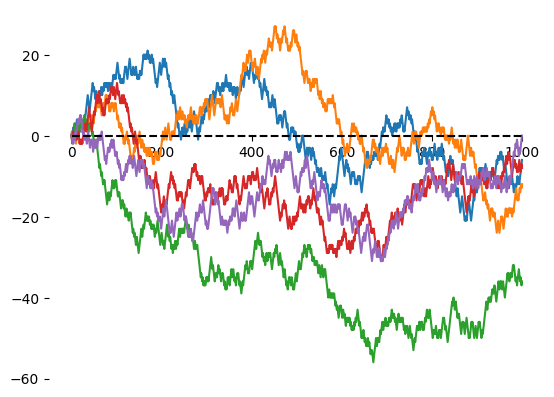

In [5]:
large_sim_x, large_sim_y = random_walk(1000)
large_sim_x2, large_sim_y2 = random_walk(1000)
large_sim_x3, large_sim_y3 = random_walk(1000)
large_sim_x4, large_sim_y4 = random_walk(1000)
large_sim_x5, large_sim_y5 = random_walk(1000)
plt.plot(large_sim_x, large_sim_y)
plt.plot(large_sim_x2, large_sim_y2)
plt.plot(large_sim_x3, large_sim_y3)
plt.plot(large_sim_x4, large_sim_y4)
plt.plot(large_sim_x5, large_sim_y5)
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))
plt.hlines(y = 0,xmin = 0,  xmax = len(large_sim_x), color = 'black', linestyle = '--')
plt.box(False)
plt.show()

Here we are still only observing 5 simulations. We know that the expected value of t at any point is zero but what can we expect is a reasonable amount of noise?

The variance at any point on this graph is given by $t$ and therefore the standard deviation of the random walk is $\sqrt{t}$, meaning that we expect the majority of the random walks to be close in proximity to the bounds of $\sqrt{t}$. Furthermore, we expect these bounds to be crossed an infinite amount of times as $t \rightarrow \infty $

Let's demonstrate this visually.

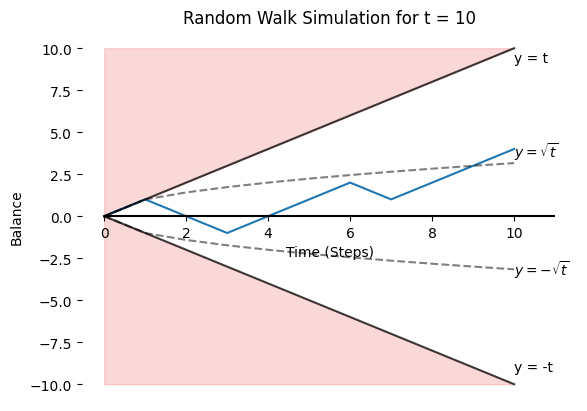

In [6]:
root_t = [t**0.5 for t in list_1]
minus_root_t = [-(t**0.5) for t in list_1]
max_y = np.array([i for i in list_1]) # Convert max_y to a NumPy array
min_y = np.array([-i for i in list_1]) # Convert min_y to a NumPy array


plt.plot(list_1, list_2)
plt.plot(list_1, root_t, linestyle = '--', alpha = 0.5, color = 'black')
plt.plot(list_1, minus_root_t, linestyle = '--', alpha = 0.5, color = 'black')
plt.plot(list_1, max_y, alpha = 0.75, color = 'black')
plt.plot(list_1, min_y, alpha = 0.75, color = 'black')
plt.hlines(y=0,xmin = 0, xmax = len(list_1), color = 'black')

plt.text(10, 9.2, 'y = t')
plt.text(10, -9.2, 'y = -t')
plt.text(10, 3.5, r'$y = \sqrt{t}$')
plt.text(10, -3.5, r'$y = -\sqrt{t}$')

plt.title(f'Random Walk Simulation for t = {len(list_1)-1}')
plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))

# Shading non-possible states of balance
plt.fill_between(list_1, max_y, len(list_1)-1, where=(max_y <= len(list_1)-1), color='lightcoral', alpha=0.3)
plt.fill_between(list_1, min_y, -(len(list_1)-1), where=(min_y >= -(len(list_1)-1)), color='lightcoral', alpha=0.3)

plt.box(False)
plt.show()

In [7]:
t_values = np.arange(0, 1001)  # Create an array of t values from 0 to 1000
sqrt_t_values = np.sqrt(t_values)
neg_sqrt_t_value = np.negative(sqrt_t_values)

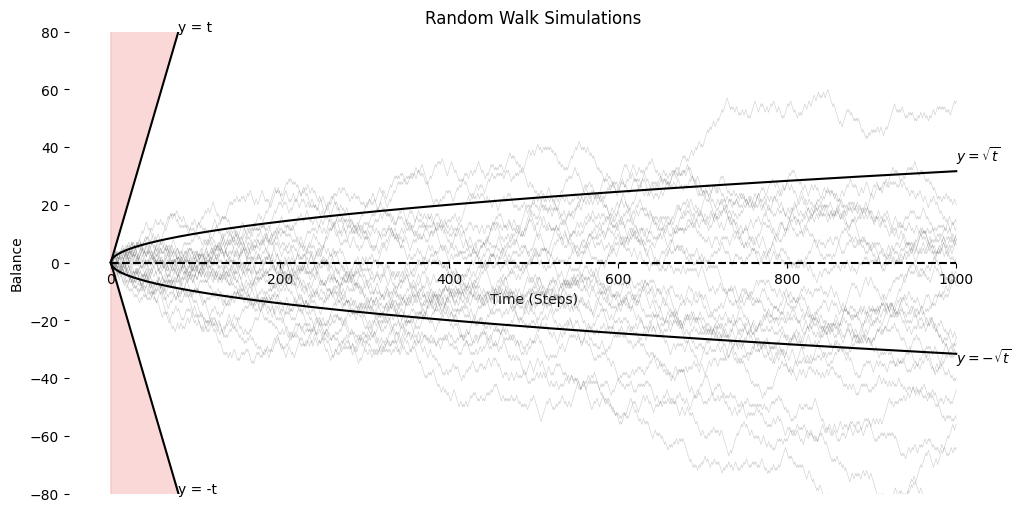

In [8]:
# Define the random walk function
def random_walk(n_trials):
    balance = [0]  # Start at zero
    running_balance = 0
    for _ in range(n_trials):
        outcome = random.randint(0, 1)
        running_balance += 1 if outcome == 1 else -1
        balance.append(running_balance)
    return list(range(len(balance))), balance

# Number of simulations
num_simulations = 25
n_trials = 1000

# Plot multiple simulations
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for _ in range(num_simulations):
    x, y = random_walk(n_trials)
    plt.plot(x, y, linewidth=0.4, alpha=0.4, color = 'gray')  # Thinner lines and transparency for readability


max_y = np.array([i for i in x])
min_y = np.array([-i for i in x])

# Plot the sqrt(t) and -sqrt(t) lines
plt.plot(t_values,sqrt_t_values, color = 'black')
plt.plot(t_values,neg_sqrt_t_value, color = 'black')
plt.plot(t_values, max_y, color = 'black')
plt.plot(t_values, min_y, color = 'black')

plt.text(80, 80, 'y = t')
plt.text(80, -80, 'y = -t')
plt.text(1000, 35, r'$y = \sqrt{t}$')
plt.text(1000, -35, r'$y = -\sqrt{t}$')

plt.fill_between(x, max_y, len(x)-1, where=(max_y <= len(x)-1), color='lightcoral', alpha=0.3)
plt.fill_between(x, min_y, -(len(x)-1), where=(min_y >= -(len(x)-1)), color='lightcoral', alpha=0.3)


# Enhance the plot
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))  # Set x-axis to the middle
plt.hlines(y=0, xmin=0, xmax=n_trials, color='black', linestyle='--')  # Add horizontal line at y=0
plt.box(False)  # Remove plot box
plt.ylim(-80,80)
plt.title('Random Walk Simulations')
plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
plt.show()


## Random Walk with Drift

The simple random walk model works for an unbiased game, however, we are interested in the difference between achieved and reported margins from the casino's perspective. Therefore we need to introduce some bias to the return to player. In Stochastic Processes, this is known as a random walk with drift.


### Proof of Expected Value

Now we are going to extend the previous proof for the **fair** coin flip and now switch to the case in which a player places a bet on a single number on a European Roulette wheel.

For a random Independent and Identically Distributed variable

<br>

$$Y_i \stackrel{iid}{\sim} \begin{cases}
35, & \text{with probability } \frac{1}{37} \\
-1, & \text{with probability } \frac{36}{37}
\end{cases}$$

for each $t,$   


$$X_{t} = \displaystyle\sum_{i=1}^{t} Y_i$$

and


$$X_{0} = 0$$

<br>

The game is no longer fair and so we need to calculate the expected value of every individual spin

<br>

$$ E\left[Y_i\right] = (-1) \cdot P(Y_i = -1) + (35) \cdot P(Y_i = 35) $$

$$= (-1) \cdot \frac{36}{37} + (35) \cdot \frac{1}{37} = -0.027... $$

<br>

And so the expected value of $X_{t}$ for any time t is given by:


<br>
$$ E\left[X_t\right] = E\left[\displaystyle\sum_{i=1}^t Y_i\right] = \displaystyle\sum_{i=1}^t \left(E\left[Y_i\right]\right) = t \cdot -0.027 = -0.027t$$

<br>


### Proof of Variance

#### 1. For Single Step

The equation for the variance of any random variable is given by the following equation:

<br>

$$ \mathrm{Var}[{X}] = E[X^2] - (E[X])^2$$

<br>

therefore the variance after a single step $Y_{i}$ is given by:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 $$

<br>

again, $Y_{i}$ can only take two values, -1 or 35

<br>

$$ Y_{i} \in \left\{ -1, 35 \right\} $$

<br>

therefore:

<br>

$$E[Y_{i}^2] = (-1)^2 \cdot P(Y_{i} = -1) + (35)^2 \cdot P(Y_{i} = 35) $$

<br>

$$= 1 \cdot \frac{36}{37} + 1225 \cdot \frac{1}{37} $$

<br>

$$ = \frac{36}{37} + \frac{1225}{37} = \frac{1261}{37} =  34.08$$

<br>

and the mean value is given by:

<br>

$$ E[Y_{i}] = \frac{-1}{37} $$

<br>

so the square of the mean term in the variance equation is:

<br>

$$ (E[Y_{i}])^2 = \left(\frac{-1}{37}\right)^2 = \frac{1}{1369} $$

<br>

and therefore substituting these into the variance formula yields:

<br>

$$ \mathrm{Var}(Y_{i}) = \frac{1261}{37} - \frac{1}{1369} = \frac{46656}{1369} = 34.08 $$

<br>

and

<br>

$$ \mathrm{Std}(X_{i}) = \sqrt{\mathrm{Var}(X_{i})} = \pm\sqrt{34.08} = \pm 5.84$$

#### 2. For Any Step t

Since the variables are independent we can simply sum the variances of each individual spin, therefore

$$ \mathrm{Var}(Y_{t}) = \sum_{i=1}^{t} \mathrm{Var}(Y_{i}) = t \cdot
 \frac{46656}{1369} = 34.08t $$

 and

$$ \mathrm{Std}(Y_{t}) = \sqrt{\sum_{i=1}^{t} \mathrm{Var}(Y_{i})} = \sqrt{t} \cdot
 \sqrt\frac{46656}{1369} = \pm 5.84\cdot\sqrt{t} $$

<br>

***Reminder***
This will only work if the random variables are independent of one-another, for roulette this assumption holds as the chances of me spinning any given number is not influenced by the last spin. This assumption may not hold for Sports Betting, especially when probabilities are dynamic.




### Python Implementation

I'll take the same function from the earlier plot but now adjust the payout to account for the drift.

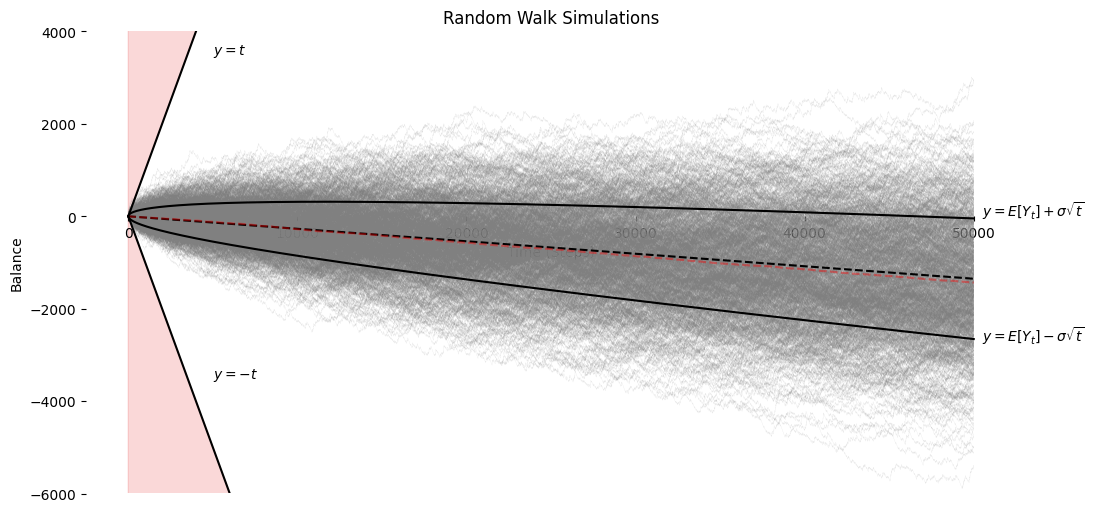

In [18]:
# Define the random walk function
def random_walk_with_drift(n_trials):
    balance = [0]  # Start at zero
    running_balance = 0
    for _ in range(n_trials):
        outcome = random.randint(0, 36)
        random_outcome = random.randint(0,36)
        running_balance += 35 if outcome == random_outcome else -1
        balance.append(running_balance)
    return list(range(len(balance))), balance

# Number of simulations
num_simulations = 1000
n_trials_drift = 50000

# Plot multiple simulations

all_drift = []

plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for _ in range(num_simulations):
    x_drift, y_drift = random_walk_with_drift(n_trials_drift)
    plt.plot(x_drift, y_drift, linewidth=0.2, alpha=0.2, color = 'gray')  # Thinner lines and transparency for readability
    all_drift.append(y_drift)

# Convert the list of lists to a numpy array
all_drift_array = np.array(all_drift)

# Compute the mean along axis 0 (i.e., across the 50 simulations for each time step)
mean_drift = np.mean(all_drift_array, axis=0)
sample_stdev_drift = np.std(all_drift_array, axis=0, ddof=1)  # ddof=1 for sample stddev
sample_stdev_drift_ub = sample_stdev_drift + mean_drift
sample_stdev_drift_lb = mean_drift - sample_stdev_drift

max_y_drift = np.array([i for i in x_drift])
min_y_drift = np.array([-i for i in x_drift])

# Correct variance and standard deviation values
sigma = 216 / 37  # Standard deviation for a single bet

# Calculate expected value and standard deviation lines
t_values_drift = np.arange(0, n_trials_drift + 1)  # Create an array of t values from 0 to 10,000
expected_with_drift = -1 / 37 * t_values_drift
pos_stdev_with_drift = expected_with_drift + sigma * np.sqrt(t_values_drift)
neg_stdev_with_drift = expected_with_drift - sigma * np.sqrt(t_values_drift)

# Plot the standard deviation lines and the expected value line
plt.plot(t_values_drift, pos_stdev_with_drift, color='black', label='Standard Deviation (Positive)')
plt.plot(t_values_drift, neg_stdev_with_drift, color='black', label='Standard Deviation (Negative)')
plt.plot(t_values_drift, expected_with_drift, color='black', linestyle='--', label='Expected Value')
#plt.plot(t_values_drift, sample_stdev_drift_ub, color = 'red', linestyle = '--')
#plt.plot(t_values_drift, sample_stdev_drift_lb, color = 'red', linestyle = '--')
plt.plot(t_values_drift, mean_drift, color='red', linestyle = '--', alpha = 0.4)
plt.plot(t_values_drift, max_y_drift, color = 'black')
plt.plot(t_values_drift, min_y_drift, color = 'black')

plt.text(5000, 3500, r'$y = t$')
plt.text(5000,-3500, r'$y = -t$')
plt.text(50500, 0, r'$y = E[Y_{t}] + \sigma \sqrt{t}$')
plt.text(50500, -2700, r'$y = E[Y_{t}] - \sigma \sqrt{t}$')

plt.fill_between(x_drift, max_y_drift, len(x_drift)-1, where=(max_y_drift <= len(x_drift)-1), color='lightcoral', alpha=0.3)
plt.fill_between(x_drift, min_y_drift, -(len(x_drift)-1), where=(min_y_drift >= -(len(x_drift)-1)), color='lightcoral', alpha=0.3)


# Enhance the plot
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))  # Set x-axis to the middle
#plt.hlines(y=0, xmin=0, xmax=n_trials, color='black', linestyle='--')  # Add horizontal line at y=0
plt.box(False)  # Remove plot box
plt.ylim(-6000,4000)
plt.title('Random Walk Simulations')
plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
plt.show()




Here I've simulated 50,000 spins for 10,000 'players', the reason I've chosen so many simulations is to demonstrate that the closing balances following the distribution:

$$ N \sim \left(\mu, \sigma^2 \right) $$

<br>

$$ N \sim \left(-\frac{t}{37}, \left(\frac{216}{37}\right)^2 t \right) $$

In [10]:
end_balances = all_drift_array[:, -1]  # Get the last column from all_drift_array


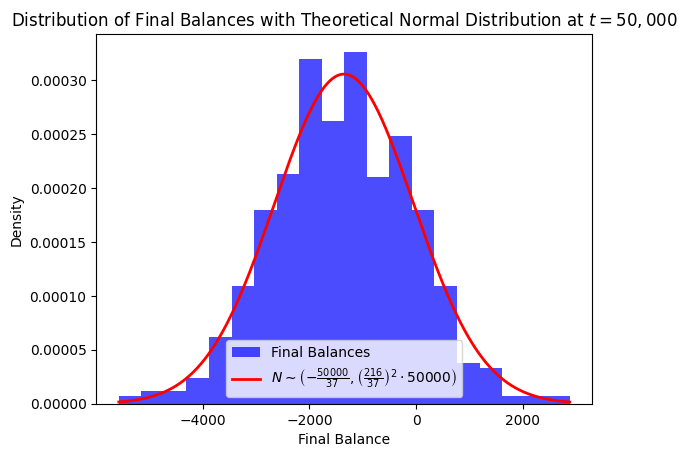

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for t = 50000
t = 50000
mean = -1 / 37 * t  # Mean of the distribution
std_dev = 5.84 * np.sqrt(t)  # Standard deviation of the distribution

# Histogram of final balances
plt.hist(end_balances, bins=20, density=True, alpha=0.7, color='blue', label='Final Balances')

# Generate values for the normal distribution
x_values = np.linspace(min(end_balances), max(end_balances), 1000)  # Range for x-axis
normal_dist = norm.pdf(x_values, loc=mean, scale=std_dev)  # Normal distribution PDF

# Plot the normal distribution over the histogram
plt.plot(x_values, normal_dist, color='red', linewidth=2, label=r'$N \sim \left(-\frac{50000}{37}, \left(\frac{216}{37}\right)^2 \cdot 50000 \right)$')

# Add labels, title, and legend
plt.title(r'Distribution of Final Balances with Theoretical Normal Distribution at $t = 50,000$')
plt.xlabel('Final Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


It can be seen that the closing balances do look as if they are drawn from the Normal Distribution defined above, this will also be the case for all large values of t. Small sample size will likely be an issue when we consider individual player behaviour.

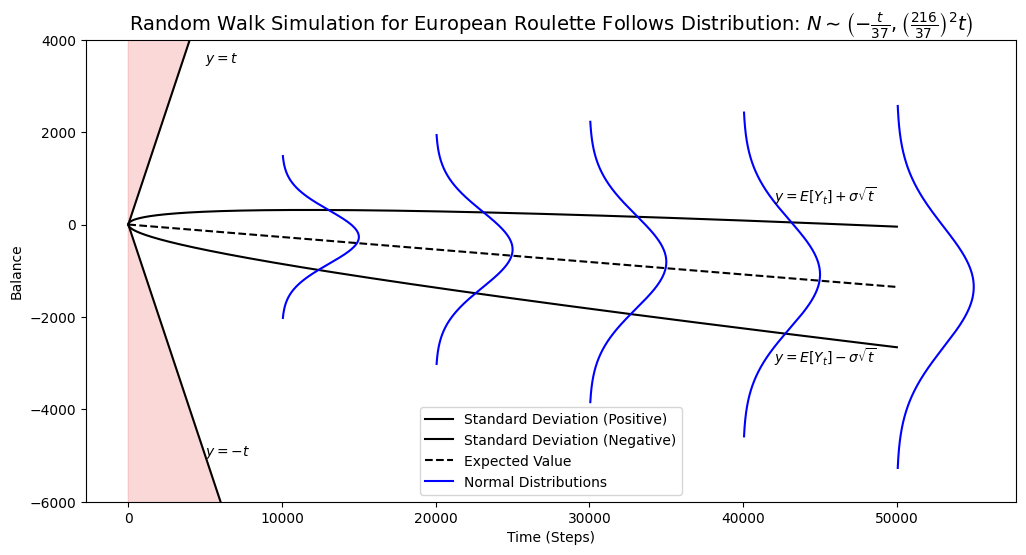

In [12]:
# Parameters for multiple points
t_values = [10000, 20000, 30000, 40000, 50000]  # Time steps to add normal distributions
scaling_factor = 5000  # Adjust this to make the peaks more pronounced

# Plot the main lines
plt.figure(figsize=(12, 6))
plt.plot(t_values_drift, pos_stdev_with_drift, color='black', label='Standard Deviation (Positive)')
plt.plot(t_values_drift, neg_stdev_with_drift, color='black', label='Standard Deviation (Negative)')
plt.plot(t_values_drift, expected_with_drift, color='black', linestyle='--', label='Expected Value')


plt.text(5000, 3500, r'$y = t$')
plt.text(5000,-5000, r'$y = -t$')
plt.text(42000, 500, r'$y = E[Y_{t}] + \sigma \sqrt{t}$')
plt.text(42000, -3000, r'$y = E[Y_{t}] - \sigma \sqrt{t}$')


# Add normal distributions at specified time steps
for t in t_values:
    # Compute center (mean) and standard deviation
    center = -1 / 37 * t
    std_dev = 5.84 * np.sqrt(t)

    # Generate normal distribution
    y_values = np.linspace(center - 3 * std_dev, center + 3 * std_dev, 1000)
    normal_dist = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((y_values - center) ** 2) / (2 * std_dev**2))

    # Normalize and scale for visualization
    normal_dist_scaled = normal_dist / max(normal_dist) * scaling_factor

    # Plot the normal distribution
    plt.plot(t + normal_dist_scaled, y_values, color='blue', label=f'Normal Distributions' if t == 10000 else None)

plt.fill_between(x_drift, max_y_drift, len(x_drift)-1, where=(max_y_drift <= len(x_drift)-1), color='lightcoral', alpha=0.3)
plt.fill_between(x_drift, min_y_drift, -(len(x_drift)-1), where=(min_y_drift >= -(len(x_drift)-1)), color='lightcoral', alpha=0.3)

plt.plot(t_values_drift, max_y_drift, color = 'black')
plt.plot(t_values_drift, min_y_drift, color = 'black')


# Add generic formula to the title
generic_formula = r'$ N \sim \left(-\frac{t}{37}, \left(\frac{216}{37}\right)^2 t \right) $'
plt.title(f'Random Walk Simulation for European Roulette Follows Distribution: {generic_formula}', fontsize=14)

plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
plt.ylim(-6000, 4000)
plt.legend()
plt.show()


## Conclusion

The simulations above have demonstrated that we can approximate a players balance at time t by drawing from a normal distribution. This will be useful when trying to calculate how likely it is that a player will hit a budget constraint as outlined in the simulation based approach.

## Appendix

### Choice of Game

In the above analysis I chose to restrict the game to a single number selection in roulette. Perhaps a more obvious choice would have been to restrict the player to only choose red or black. The expected value is still the same, however the variance is lower and therefore requires smaller values of t for our simulation to appear near-normal.

#### Expected Value for Colour Choice

Consider the case in which a player places a bet on red or black on a European Roulette wheel.

For a random Independent and Identically Distributed variable

<br>

$$Y_i \stackrel{iid}{\sim} \begin{cases}
1, & \text{with probability } \frac{18}{37} \\
-1, & \text{with probability } \frac{19}{37}
\end{cases}$$

for each $t,$   


$$X_{t} = \displaystyle\sum_{i=1}^{t} Y_i$$

and


$$X_{0} = 0$$

<br>

The game is no longer fair and so we need to calculate the expected value of every individual spin

<br>

$$ E\left[Y_i\right] = (-1) \cdot P(Y_i = -1) + (1) \cdot P(Y_i = 1) $$

$$= (-1) \cdot \frac{19}{37} + (1) \cdot \frac{18}{37} = -\frac{1}{37} $$

<br>

And so the expected value of $X_{t}$ for any time t is given by:


<br>
$$ E\left[X_t\right] = E\left[\displaystyle\sum_{i=1}^t Y_i\right] = \displaystyle\sum_{i=1}^t \left(E\left[Y_i\right]\right) = t \cdot -\frac{1}{37} = \frac{-t}{37}$$

<br>

Which is the same as what we had for individual number choice.


#### Variance and Standard Deviation for Colour Choice

The equation for the variance of any random variable is given by the following equation:

<br>

$$ \mathrm{Var}[{X}] = E[X^2] - (E[X])^2$$

<br>

therefore the variance after a single step $Y_{i}$ is given by:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 $$

<br>

again, $Y_{i}$ can only take two values, -1 or 35

<br>

$$ Y_{i} \in \left\{ -1, 1 \right\} $$

<br>

therefore:

<br>

$$E[Y_{i}^2] = (-1)^2 \cdot P(Y_{i} = -1) + (1)^2 \cdot P(Y_{i} = 1) $$

<br>

$$= 1 \cdot \frac{18}{37} + 1 \cdot \frac{19}{37} $$

<br>

$$ = 1 $$

<br>

and the mean value is given by:

<br>

$$ E[Y_{i}] = \frac{-1}{37} $$

<br>

so the square of the mean term in the variance equation is:

<br>

$$ (E[Y_{i}])^2 = \left(\frac{-1}{37}\right)^2 = \frac{1}{1369} $$

<br>

and therefore substituting these into the variance formula yields:

<br>

$$ \mathrm{Var}(Y_{i}) = 1 - \frac{1}{1369} = \frac{1368}{1369}  $$

<br>

and

<br>

$$ \mathrm{Std}(X_{i}) = \sqrt{\mathrm{Var}(X_{i})} = \pm\frac{6\sqrt{38}}{37} $$

#### Distribution

We have calculated that for the colour choice the ending balances will follow a distribution of

$$ N \sim \left(-\frac{t}{37}, \left(\frac{6\sqrt{38}}{37}\right)^2 t \right) $$

In [29]:
# Define the random walk function
def random_walk_with_drift_colours(n_trials):
    balance = [0]  # Start at zero
    running_balance = 0
    for _ in range(n_trials):
        outcome = random.randint(0, 36)
        running_balance += 1 if outcome <= 17 else -1
        balance.append(running_balance)
    return list(range(len(balance))), balance

# Number of simulations
num_simulations = 1000
n_trials_drift = 50000

all_drift_colour = []

plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for _ in range(num_simulations):
    x_drift_colour, y_drift_colour = random_walk_with_drift_colours(n_trials_drift)
    #plt.plot(x_drift_colour, y_drift_colour, linewidth=0.2, alpha=0.2, color = 'gray')  # Thinner lines and transparency for readability
    all_drift_colour.append(y_drift_colour)

# Convert the list of lists to a numpy array
all_drift_array_colour = np.array(all_drift_colour)

<Figure size 1200x600 with 0 Axes>

In [21]:
t_values_drift = np.arange(0, n_trials_drift + 1)
sigma_colour = 6*np.sqrt(38)/37
expected_with_drift_colour = -1 / 37 * t_values_drift
pos_stdev_with_drift_colour = expected_with_drift_colour + sigma_colour * np.sqrt(t_values_drift)
neg_stdev_with_drift_colour = expected_with_drift_colour - sigma_colour * np.sqrt(t_values_drift)

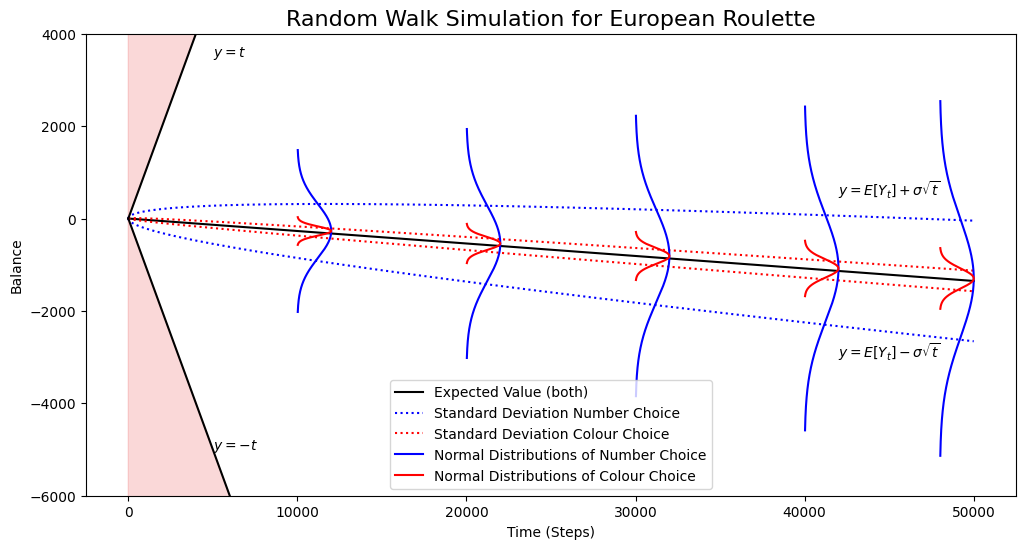

In [28]:
# Parameters for multiple points
t_values = [10000, 20000, 30000, 40000, 48000]  # Time steps to add normal distributions
scaling_factor = 2000  # Adjust this to make the peaks more pronounced

# Plot the main lines
plt.figure(figsize=(12, 6))
plt.plot(t_values_drift, expected_with_drift, color='black', label='Expected Value (both)')
plt.plot(t_values_drift, pos_stdev_with_drift, color='blue', linestyle = 'dotted', label='Standard Deviation Number Choice')
plt.plot(t_values_drift, neg_stdev_with_drift, color='blue', linestyle = 'dotted')
plt.plot(t_values_drift, pos_stdev_with_drift_colour, color='red', linestyle = 'dotted', label='Standard Deviation Colour Choice')
plt.plot(t_values_drift, neg_stdev_with_drift_colour, color='red', linestyle = 'dotted')



plt.text(5000, 3500, r'$y = t$')
plt.text(5000,-5000, r'$y = -t$')
plt.text(42000, 500, r'$y = E[Y_{t}] + \sigma \sqrt{t}$')
plt.text(42000, -3000, r'$y = E[Y_{t}] - \sigma \sqrt{t}$')


# Add normal distributions at specified time steps
for t in t_values:
    # Compute center (mean) and standard deviation
    center = -1 / 37 * t
    std_dev = 5.84 * np.sqrt(t)
    center_color = -1/37 * t
    std_dev_color = 6*np.sqrt(38)/37 * np.sqrt(t)

    # Generate normal distribution
    y_values = np.linspace(center - 3 * std_dev, center + 3 * std_dev, 1000)
    normal_dist = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-((y_values - center) ** 2) / (2 * std_dev**2))
    y_values_color = np.linspace(center_color - 3 * std_dev_color, center_color + 3 * std_dev_color,1000)
    normal_dist_color = (1 / (std_dev_color * np.sqrt(2 * np.pi))) * np.exp(-((y_values_color - center_color) ** 2) / (2 * std_dev_color**2))

    # Normalize and scale for visualization
    normal_dist_scaled = normal_dist / max(normal_dist) * scaling_factor
    normal_dist_scaled_color = normal_dist_color / max(normal_dist_color) * scaling_factor

    # Plot the normal distribution
    plt.plot(t + normal_dist_scaled, y_values, color='blue', label=f'Normal Distributions of Number Choice' if t == 10000 else None)
    plt.plot(t + normal_dist_scaled_color, y_values_color, color='red', label=f'Normal Distributions of Colour Choice' if t == 10000 else None)

plt.fill_between(x_drift, max_y_drift, len(x_drift)-1, where=(max_y_drift <= len(x_drift)-1), color='lightcoral', alpha=0.3)
plt.fill_between(x_drift, min_y_drift, -(len(x_drift)-1), where=(min_y_drift >= -(len(x_drift)-1)), color='lightcoral', alpha=0.3)

plt.plot(t_values_drift, max_y_drift, color = 'black')
plt.plot(t_values_drift, min_y_drift, color = 'black')


# Add generic formula to the title
generic_formula = r'$ N \sim \left(-\frac{t}{37}, \left(\frac{216}{37}\right)^2 t \right) $'
plt.title(f'Random Walk Simulation for European Roulette', fontsize=16)

plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
plt.ylim(-6000, 4000)
plt.legend()
plt.show()


From this we can see the colour choice distributions have a far smaller variance and therefore standard deviation.

This will become important in analysis for stopping times as the likelihood of hitting a stop gap becomes higher.